In [5]:
import sys 
sys.path.append("/Users/johnzhou/research/decision-making")

In [6]:
from omegaconf import OmegaConf
from scipy import io
import numpy as np
import matplotlib.pyplot as plt

In [75]:
ql_feats = np.load("/Users/johnzhou/research/decision-making/data/qlearning_sim_features.npy")
ql_labels = np.load("/Users/johnzhou/research/decision-making/data/qlearning_sim_labels.npy")
inf_feats = np.load("/Users/johnzhou/research/decision-making/data/inference_sim_features.npy")
inf_labels = np.load("/Users/johnzhou/research/decision-making/data/inference_sim_labels.npy")

In [76]:
print(ql_feats.shape)
print(ql_labels.shape)
print(inf_feats.shape)
print(inf_labels.shape)
ql_feats[1, :] /= 7
inf_feats[1, :] /= 1.7

(4, 500)
(2, 500)
(4, 150)
(2, 150)


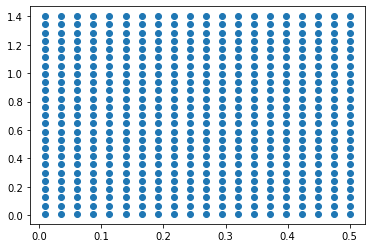

In [77]:
plt.figure()
plt.scatter(ql_labels[0, :], ql_labels[1, :])
plt.show()

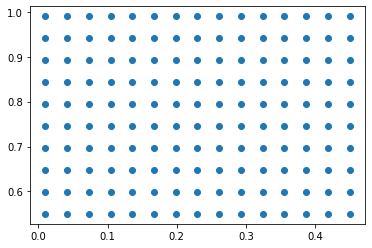

In [78]:
plt.figure()
plt.scatter(inf_labels[0, :], inf_labels[1, :])
plt.show()

In [79]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [80]:
all_feats = np.concatenate((ql_feats, inf_feats), axis=1).T
X_embedded = TSNE(n_components=2, perplexity=30, learning_rate='auto', init='pca').fit_transform(all_feats)
print(X_embedded.shape)

/Users/johnzhou/anaconda3/envs/yass/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


(650, 2)


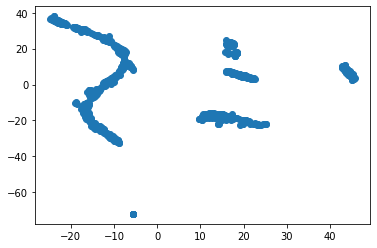

In [81]:
plt.figure()
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.show()

In [82]:
cluster_labels = KMeans(n_clusters=6, random_state=0).fit(X_embedded).labels_
print(cluster_labels.shape)

(650,)


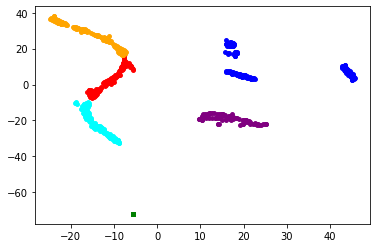

In [83]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']
plt.figure()
for idx, pt in enumerate(X_embedded):
    plt.scatter(*pt, color=colors[cluster_labels[idx]], s=15)
plt.show()

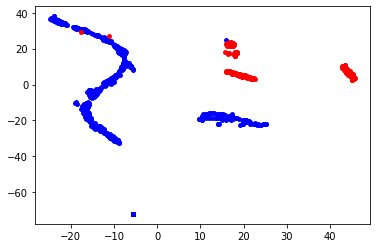

In [84]:
plt.figure()
for idx, pt in enumerate(X_embedded):
    if idx < 500:
        plt.scatter(*pt, color='blue', s=15)
    else:
        plt.scatter(*pt, color='red', s=15)
plt.show()

/Users/johnzhou/anaconda3/envs/yass/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


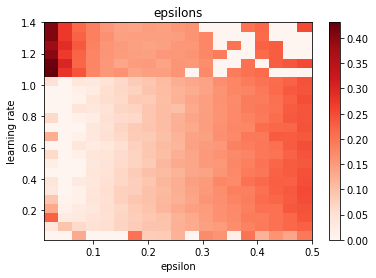

In [85]:
fig, ax = plt.subplots()
titles = ["epsilons", "alphas", "s", "foraging efficiency"]
i = 0

feat = ql_feats[i, :]

eps = np.linspace(0.01, 0.5, num=20)
lr = np.linspace(0.01, 1.4, num=25)
epss, lrs = np.meshgrid(eps, lr)
z = np.reshape(feat, (25, 20))
plt.xlabel("epsilon")
plt.ylabel("learning rate")

c = ax.pcolormesh(epss, lrs, z, cmap='Reds', vmin=np.min(feat), vmax=np.max(feat))
ax.set_title(titles[i])
# set the limits of the plot to the limits of the data
ax.axis([np.min(epss), np.max(epss), np.min(lrs), np.max(lrs)])
fig.colorbar(c, ax=ax)


431


/Users/johnzhou/anaconda3/envs/yass/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


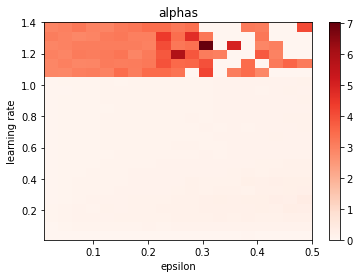

In [86]:
fig, ax = plt.subplots()
i = 1

feat = np.copy(ql_feats[i, :])
z = np.reshape(feat, (25, 20))
plt.xlabel("epsilon")
plt.ylabel("learning rate")

print(np.argmax(feat))

c = ax.pcolormesh(epss, lrs, z, cmap='Reds', vmin=np.min(feat), vmax=np.max(feat))
ax.set_title(titles[i])
# set the limits of the plot to the limits of the data
ax.axis([np.min(epss), np.max(epss), np.min(lrs), np.max(lrs)])
fig.colorbar(c, ax=ax)

/Users/johnzhou/anaconda3/envs/yass/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if __name__ == '__main__':


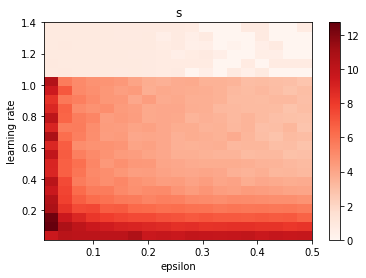

In [87]:
fig, ax = plt.subplots()
i = 2

feat = ql_feats[i, :]
z = np.reshape(feat, (25, 20))
plt.xlabel("epsilon")
plt.ylabel("learning rate")

c = ax.pcolormesh(epss, lrs, z, cmap='Reds', vmin=np.min(feat), vmax=np.max(feat))
ax.set_title(titles[i])
# set the limits of the plot to the limits of the data
ax.axis([np.min(epss), np.max(epss), np.min(lrs), np.max(lrs)])
fig.colorbar(c, ax=ax)


/Users/johnzhou/anaconda3/envs/yass/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if __name__ == '__main__':


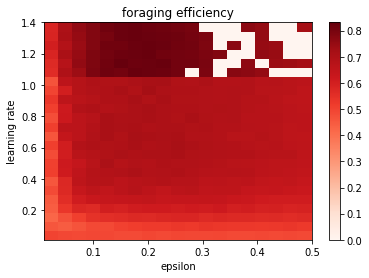

In [88]:
fig, ax = plt.subplots()
i = 3

feat = ql_feats[i, :]
z = np.reshape(feat, (25, 20))
plt.xlabel("epsilon")
plt.ylabel("learning rate")

c = ax.pcolormesh(epss, lrs, z, cmap='Reds', vmin=np.min(feat), vmax=np.max(feat))
ax.set_title(titles[i])
# set the limits of the plot to the limits of the data
ax.axis([np.min(epss), np.max(epss), np.min(lrs), np.max(lrs)])
fig.colorbar(c, ax=ax)


/Users/johnzhou/anaconda3/envs/yass/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


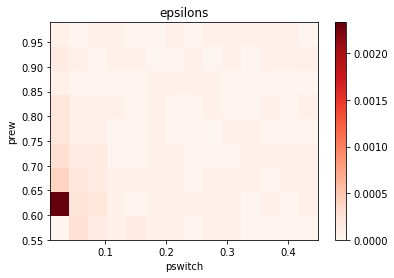

In [89]:
fig, ax = plt.subplots()
titles = ["epsilons", "alphas", "s", "foraging efficiency"]
i = 0

feat = inf_feats[i, :]

pswitches = np.linspace(0.01, 0.45, num=15)
prews = np.linspace(0.55, 0.99, num=10)
pswitches, prews = np.meshgrid(pswitches, prews)
z = np.reshape(feat, (10, 15))
plt.xlabel("pswitch")
plt.ylabel("prew")

c = ax.pcolormesh(pswitches, prews, z, cmap='Reds', vmin=np.min(feat), vmax=np.max(feat))
ax.set_title(titles[i])
# set the limits of the plot to the limits of the data
ax.axis([np.min(pswitches), np.max(pswitches), np.min(prews), np.max(prews)])
fig.colorbar(c, ax=ax)

/Users/johnzhou/anaconda3/envs/yass/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


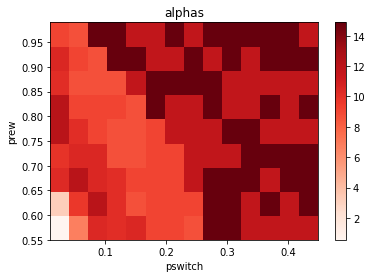

In [90]:
fig, ax = plt.subplots()
titles = ["epsilons", "alphas", "s", "foraging efficiency"]
i = 1

feat = inf_feats[i, :]

pswitches = np.linspace(0.01, 0.45, num=15)
prews = np.linspace(0.55, 0.99, num=10)
pswitches, prews = np.meshgrid(pswitches, prews)
z = np.reshape(feat, (10, 15))
plt.xlabel("pswitch")
plt.ylabel("prew")

c = ax.pcolormesh(pswitches, prews, z, cmap='Reds', vmin=np.min(feat), vmax=np.max(feat))
ax.set_title(titles[i])
# set the limits of the plot to the limits of the data
ax.axis([np.min(pswitches), np.max(pswitches), np.min(prews), np.max(prews)])
fig.colorbar(c, ax=ax)

/Users/johnzhou/anaconda3/envs/yass/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


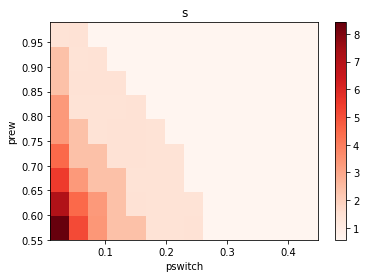

In [91]:
fig, ax = plt.subplots()
titles = ["epsilons", "alphas", "s", "foraging efficiency"]
i = 2

feat = inf_feats[i, :]

pswitches = np.linspace(0.01, 0.45, num=15)
prews = np.linspace(0.55, 0.99, num=10)
pswitches, prews = np.meshgrid(pswitches, prews)
z = np.reshape(feat, (10, 15))
plt.xlabel("pswitch")
plt.ylabel("prew")

c = ax.pcolormesh(pswitches, prews, z, cmap='Reds', vmin=np.min(feat), vmax=np.max(feat))
ax.set_title(titles[i])
# set the limits of the plot to the limits of the data
ax.axis([np.min(pswitches), np.max(pswitches), np.min(prews), np.max(prews)])
fig.colorbar(c, ax=ax)

/Users/johnzhou/anaconda3/envs/yass/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


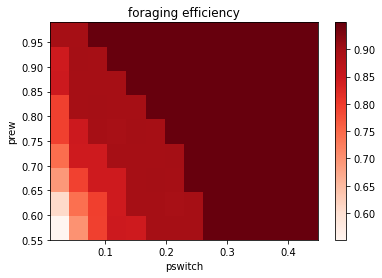

In [92]:
fig, ax = plt.subplots()
titles = ["epsilons", "alphas", "s", "foraging efficiency"]
i = 3

feat = inf_feats[i, :]

pswitches = np.linspace(0.01, 0.45, num=15)
prews = np.linspace(0.55, 0.99, num=10)
pswitches, prews = np.meshgrid(pswitches, prews)
z = np.reshape(feat, (10, 15))
plt.xlabel("pswitch")
plt.ylabel("prew")

c = ax.pcolormesh(pswitches, prews, z, cmap='Reds', vmin=np.min(feat), vmax=np.max(feat))
ax.set_title(titles[i])
# set the limits of the plot to the limits of the data
ax.axis([np.min(pswitches), np.max(pswitches), np.min(prews), np.max(prews)])
fig.colorbar(c, ax=ax)